Importation des bibliothèques

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

Importation dataset

In [ ]:
df=pd.read_csv('accident.csv')
df=pd.DataFrame(df)
df.head(20)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
5,25,Male,49.0,Yes,Yes,1
6,38,Male,116.0,Yes,Yes,1
7,56,Male,47.0,Yes,Yes,1
8,36,Female,83.0,Yes,No,1
9,40,Female,116.0,Yes,No,1


EDA dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


Analyse Univariée variables Continues :
- Speed_of_Impact
- Age

In [6]:
df[["Age", "Speed_of_Impact"]].describe().round(2)

,Age,Speed_of_Impact
count,200.00,197.00
mean,43.42,70.44
std,14.94,30.13
min,18.00,20.00
25%,31.00,43.00
50%,43.50,71.00
75%,56.00,95.00
max,69.00,119.00


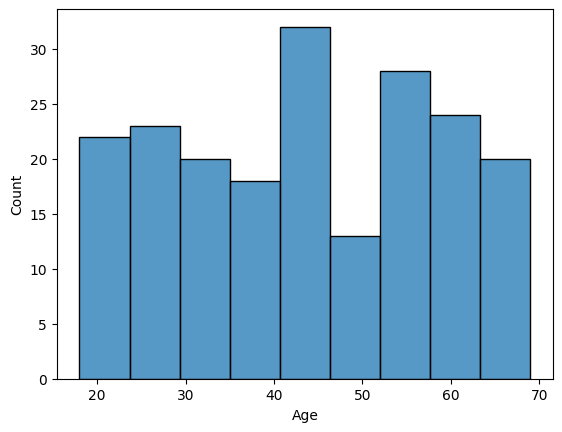

In [7]:
sns.histplot(df["Age"])
plt.show()

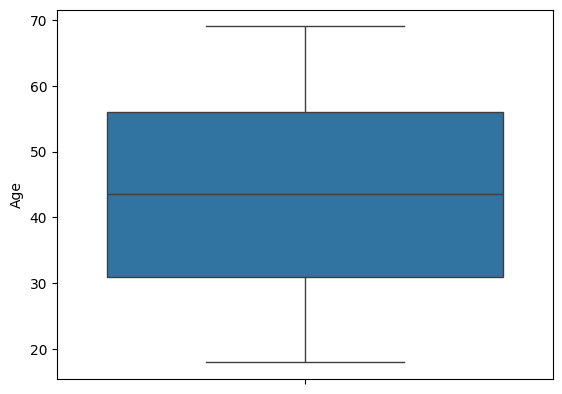

In [8]:
sns.boxplot(df["Age"])
plt.show()

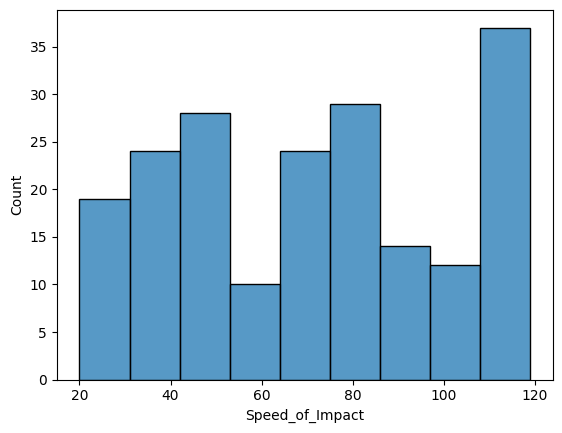

In [9]:
sns.histplot(df["Speed_of_Impact"])
plt.show()

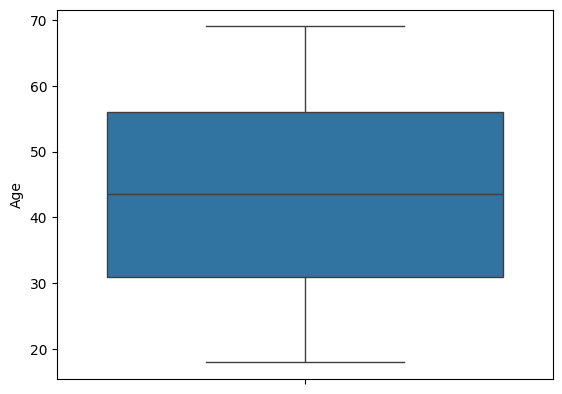

In [10]:
sns.boxplot(df["Age"])
plt.show()

Analyse Bivariée variables Continues :
- Speed_of_Impact
- Age

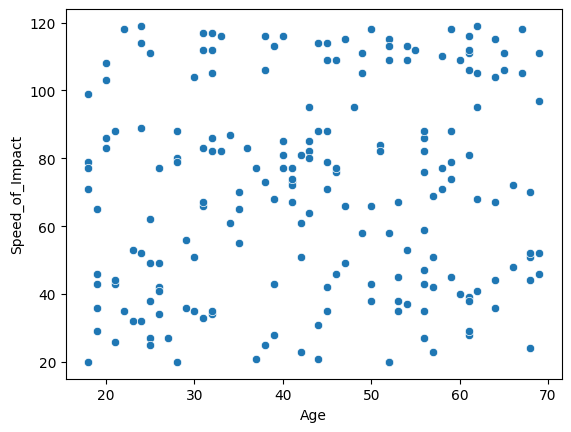

In [11]:
sns.scatterplot(x="Age", y="Speed_of_Impact", data=df)
plt.show()

Analyses Univariée variables discrètes:

In [12]:
print(df["Gender"].value_counts())
print(df["Gender"].value_counts()*100/199)

Gender
Female    110
Male       89
Name: count, dtype: int64
Gender
Female    55.276382
Male      44.723618
Name: count, dtype: float64


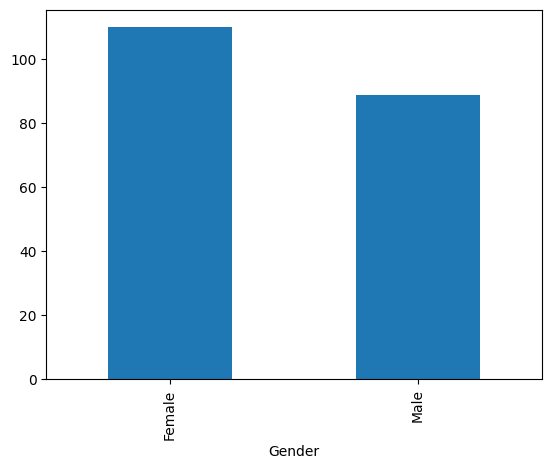

In [13]:
df["Gender"].value_counts().plot(kind="bar")
plt.show()

In [14]:
print(df["Helmet_Used"].value_counts())
print(df["Helmet_Used"].value_counts()*100/199)

Helmet_Used
Yes    111
No      89
Name: count, dtype: int64
Helmet_Used
Yes    55.778894
No     44.723618
Name: count, dtype: float64


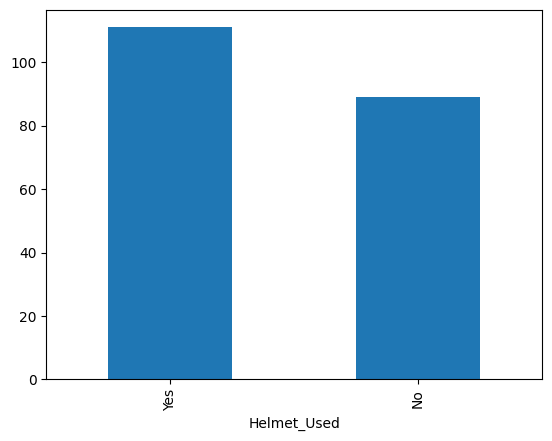

In [15]:
df["Helmet_Used"].value_counts().plot(kind="bar")
plt.show()

In [16]:
print(df["Seatbelt_Used"].value_counts())
print(df["Seatbelt_Used"].value_counts()*100/199)

Seatbelt_Used
Yes    111
No      89
Name: count, dtype: int64
Seatbelt_Used
Yes    55.778894
No     44.723618
Name: count, dtype: float64


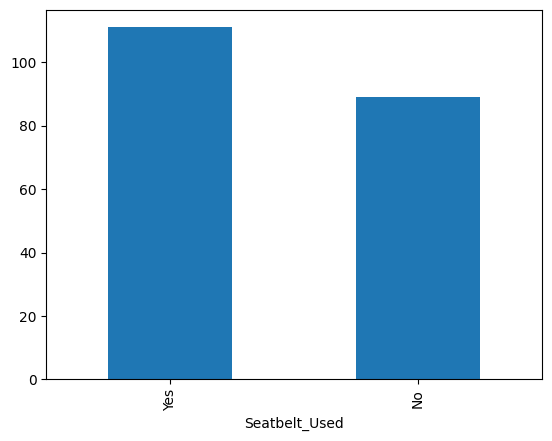

In [17]:
df["Seatbelt_Used"].value_counts().plot(kind="bar")
plt.show()

In [18]:
print(df["Survived"].value_counts())
print(df["Survived"].value_counts()*100/199)

Survived
1    101
0     99
Name: count, dtype: int64
Survived
1    50.753769
0    49.748744
Name: count, dtype: float64


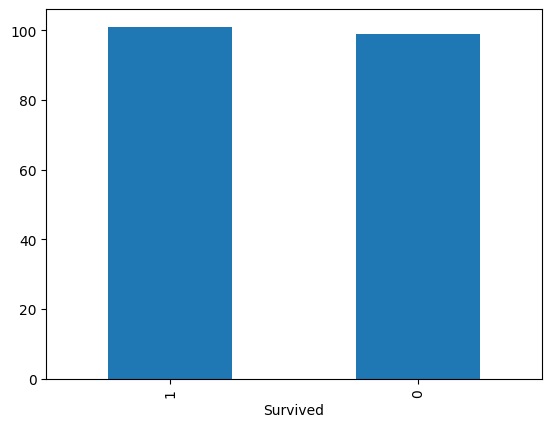

In [19]:
df["Survived"].value_counts().plot(kind="bar")
plt.show()

Analyse Bivariée variables discrètes

In [20]:
cross_tab_Survived_Gender=pd.crosstab(df["Survived"],df["Gender"])
cross_tab_Survived_Gender

Gender,Female,Male
Survived,,
0,60,38
1,50,51


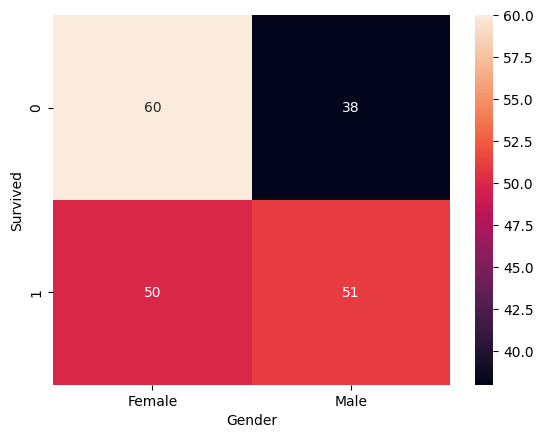

In [21]:
sns.heatmap(cross_tab_Survived_Gender,annot=True)
plt.show()

In [22]:
cross_tab_Survived_Seatbelt_Used=pd.crosstab(df["Survived"],df["Seatbelt_Used"])
cross_tab_Survived_Seatbelt_Used

Seatbelt_Used,No,Yes
Survived,,
0,47,52
1,42,59


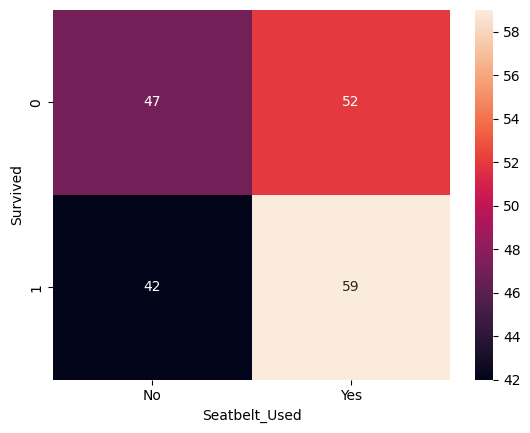

In [23]:
sns.heatmap(cross_tab_Survived_Seatbelt_Used,annot=True)
plt.show()

In [24]:
cross_tab_Survived_Helmet_Used=pd.crosstab(df["Survived"],df["Helmet_Used"])
cross_tab_Survived_Helmet_Used

Helmet_Used,No,Yes
Survived,,
0,42,57
1,47,54


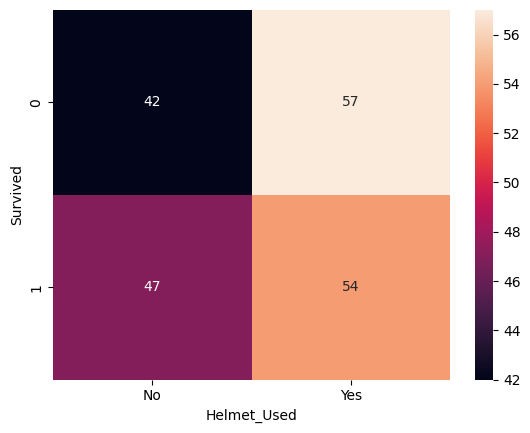

In [25]:
sns.heatmap(cross_tab_Survived_Helmet_Used,annot=True)
plt.show()

Analyse Bivariée variables discrètes-continues

In [26]:
df.groupby("Survived")["Age"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,99.0,41.77,15.10,18.0,28.5,43.0,56.0,68.0
1,101.0,45.05,14.68,18.0,32.0,45.0,56.0,69.0


In [27]:
df.groupby("Survived")["Speed_of_Impact"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,97.0,69.14,30.95,20.0,42.00,70.0,95.0,119.0
1,100.0,71.70,29.40,20.0,45.75,73.5,95.5,119.0


Tests statistiques

Test Analyse Bivariée variables discrètes

Les conditions pour utiliser les tests:
- Les données doivent être independantes, par exemple dans le cas de la variable "Gender" les données sont independantes c'est-à-dire le genre d'une personne n'influence pas sur son voisin et même chose pour l'âge et les données viennent de la même population. Condition Ok

- Les variables ont plus de 30 données

L’hypothèse H0 : Nos deux variables sont independantes 
L’hypothèse H1 : Nos deux variables sont dependantes 

pvalue: Est la probabilité d’observer une différence au moins aussi extrême que nous avons observée lors de nos analyses.

Valeur seuil: alpha=5% (0,005)

Si pvalue < alpha on rejettera l'hypothèse H0, sinon on ne rejettera pas H0


In [28]:
#cross_tab_Survived_Gender
from scipy.stats import chi2_contingency
res = chi2_contingency(cross_tab_Survived_Gender)
print(f"La valeur de pvalue est {res.pvalue}")
print(f"La valeur de pvalue {res.pvalue} étant superieur à 0.05, on ne rejette pas l'hypothèse nulle ")
print("Les variables 'Survived' et 'Age' sont indépendantes")

La valeur de pvalue est 0.12857383013481866
La valeur de pvalue 0.12857383013481866 étant superieur à 0.05, on ne rejette pas l'hypothèse nulle 
Les variables 'Survived' et 'Age' sont indépendantes


In [29]:
#cross_tab_Survived_Seatbelt_Used
from scipy.stats import chi2_contingency
res = chi2_contingency(cross_tab_Survived_Seatbelt_Used)
print(f"La valeur de pvalue est {res.pvalue}")
print(f"La valeur de pvalue {res.pvalue} étant superieur à 0.05, on ne rejette pas l'hypothèse nulle ")
print("Les variables 'Survived' et 'Seatbelt_Used' sont indépendantes")

La valeur de pvalue est 0.48654941737349877
La valeur de pvalue 0.48654941737349877 étant superieur à 0.05, on ne rejette pas l'hypothèse nulle 
Les variables 'Survived' et 'Seatbelt_Used' sont indépendantes


In [30]:
#cross_tab_Survived_Helmet_Used
from scipy.stats import chi2_contingency
res = chi2_contingency(cross_tab_Survived_Helmet_Used)
print(f"La valeur de pvalue est {res.pvalue}")
print(f"La valeur de pvalue {res.pvalue} étant superieur à 0.05, on ne rejette pas l'hypothèse nulle ")
print("Les variables 'Survived' et 'SeatbelHelmet_Usedt_Used' sont indépendantes")

La valeur de pvalue est 0.6581072801152705
La valeur de pvalue 0.6581072801152705 étant superieur à 0.05, on ne rejette pas l'hypothèse nulle 
Les variables 'Survived' et 'SeatbelHelmet_Usedt_Used' sont indépendantes


Test Analyse Bivariée variables continues

In [31]:
df_copy=df.copy()
df_copy.dropna(inplace=True)
df_copy.isnull().sum()

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [32]:
from scipy.stats import pearsonr
corr = pearsonr(df_copy["Age"], df_copy["Speed_of_Impact"])
print("L'hypothèse H0: IL n'y a pas de corrélation entre l'age et la vitesse d'impact")
print("L'hypothèse H1: IL y a une corrélation entre l'age et la vitesse d'impact") 
print(f"La valeur de pvalue est {corr.pvalue}")
print(f"La valeur de pvalue {corr.pvalue} étant superieur à 0.05, on ne rejettera pas l'hypothèse H0 ")

L'hypothèse H0: IL n'y a pas de corrélation entre l'age et la vitesse d'impact
L'hypothèse H1: IL y a une corrélation entre l'age et la vitesse d'impact
La valeur de pvalue est 0.13612764699731406
La valeur de pvalue 0.13612764699731406 étant superieur à 0.05, on ne rejettera pas l'hypothèse H0 


Pre-processing

In [34]:
Y = df_copy['Survived']
X = df_copy.drop(columns=['Survived'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (156, 5)
X_test shape: (40, 5)
Y_train shape: (156,)
Y_test shape: (40,)


- Encodage

In [56]:
X_train_num = X_train.select_dtypes(include=[np.number])
X_train_cat = X_train.select_dtypes(include=[object])

In [64]:
scaler = MinMaxScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_train_num

,Age,Speed_of_Impact
5,0.137255,0.292929
69,0.019608,0.232323
140,0.705882,0.333333
101,0.000000,0.515152
172,0.235294,0.848485
...,...,...
110,0.196078,0.595960
14,0.764706,0.030303
96,0.862745,0.212121
183,0.529412,0.949495


In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False)
X_train_cat_encoded = onehot_encoder.fit_transform(X_train_cat)

X_train_cat_encoded_df = pd.DataFrame(
    X_train_cat_encoded, 
    columns=onehot_encoder.get_feature_names_out(X_train_cat.columns)
)

X_train_cat_encoded_df

,Gender_Female,Gender_Male,Helmet_Used_No,Helmet_Used_Yes,Seatbelt_Used_No,Seatbelt_Used_Yes
5,0.0,1.0,0.0,1.0,0.0,1.0
69,0.0,1.0,1.0,0.0,1.0,0.0
140,1.0,0.0,0.0,1.0,1.0,0.0
101,0.0,1.0,0.0,1.0,0.0,1.0
172,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
110,1.0,0.0,1.0,0.0,0.0,1.0
14,1.0,0.0,1.0,0.0,0.0,1.0
96,1.0,0.0,0.0,1.0,1.0,0.0
183,0.0,1.0,1.0,0.0,1.0,0.0


In [59]:
X_train_combined = pd.concat([X_train_num, X_train_cat_encoded_df], axis=1)
X_train_combined

,Age,Speed_of_Impact,Gender_Female,Gender_Male,Helmet_Used_No,Helmet_Used_Yes,Seatbelt_Used_No,Seatbelt_Used_Yes
5,0.137255,0.292929,0.0,1.0,0.0,1.0,0.0,1.0
69,0.019608,0.232323,0.0,1.0,1.0,0.0,1.0,0.0
140,0.705882,0.333333,1.0,0.0,0.0,1.0,1.0,0.0
101,0.000000,0.515152,0.0,1.0,0.0,1.0,0.0,1.0
172,0.235294,0.848485,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
110,0.196078,0.595960,1.0,0.0,1.0,0.0,0.0,1.0
14,0.764706,0.030303,1.0,0.0,1.0,0.0,0.0,1.0
96,0.862745,0.212121,1.0,0.0,0.0,1.0,1.0,0.0
183,0.529412,0.949495,0.0,1.0,1.0,0.0,1.0,0.0


In [61]:
X_test

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used
143,20,Female,108.0,No,Yes
117,22,Male,118.0,Yes,No
17,39,Male,68.0,No,No
79,53,Male,35.0,Yes,No
158,56,Male,76.0,No,Yes
189,45,Male,88.0,Yes,No
73,46,Male,76.0,Yes,No
59,61,Male,28.0,No,No
20,61,Female,111.0,No,No
173,49,Male,58.0,Yes,No


Transformion X_test

In [ ]:

X_test_num = X_test.select_dtypes(include=[np.number])
X_test_cat = X_test.select_dtypes(include=[object])

X_test_num[["Age", "Speed_of_Impact"]] = scaler.transform(X_test_num[["Age", "Speed_of_Impact"]])

X_test_cat_encoded = onehot_encoder.transform(X_test_cat)

X_test_cat_encoded_df = pd.DataFrame(
    X_test_cat_encoded, 
    columns=onehot_encoder.get_feature_names_out(X_test_cat.columns)
)


X_test_combined = pd.concat([X_test_num.reset_index(drop=True), X_test_cat_encoded_df.reset_index(drop=True)], axis=1)
X_test_combined


,Age,Speed_of_Impact,Gender_Female,Gender_Male,Helmet_Used_No,Helmet_Used_Yes,Seatbelt_Used_No,Seatbelt_Used_Yes
0,20.0,108.0,1.0,0.0,1.0,0.0,0.0,1.0
1,22.0,118.0,0.0,1.0,0.0,1.0,1.0,0.0
2,39.0,68.0,0.0,1.0,1.0,0.0,1.0,0.0
3,53.0,35.0,0.0,1.0,0.0,1.0,1.0,0.0
4,56.0,76.0,0.0,1.0,1.0,0.0,0.0,1.0
5,45.0,88.0,0.0,1.0,0.0,1.0,1.0,0.0
6,46.0,76.0,0.0,1.0,0.0,1.0,1.0,0.0
7,61.0,28.0,0.0,1.0,1.0,0.0,1.0,0.0
8,61.0,111.0,1.0,0.0,1.0,0.0,1.0,0.0
9,49.0,58.0,0.0,1.0,0.0,1.0,1.0,0.0


Entrainement du modèle 

In [67]:
model = LogisticRegression()
model.fit(X_train_combined, Y_train)

LogisticRegression()

Test du modèle 

- prediction

In [73]:
y_pred = model.predict(X_test_combined)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- Evaluation 

In [71]:
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.375